In [66]:
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [67]:
file_list = glob.glob("*.csv")
file_list

['CIANflats1.csv', 'CIANflats3.csv', 'CIANflats2.csv']

In [68]:
data = pd.concat([pd.read_csv(f, index_col=0) for f in file_list])

In [69]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Линк,Кухня,Срок сдачи,Площадь комнат+ обозначение смежных комнат- обозначение изолированных комнат,Построен,Ремонт,Вид из окон,Отделка,Планировка
1,41,30.0,2,Вторичка,"2,75 м",1 совмещенный,1 балкон,1970000,1-комн.,р-н Дзержинский,https://volgograd.cian.ru/sale/flat/241860530/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27,13.0,6,Вторичка,NaN,1 совмещенный,1 балкон,1595000,1-комн.,р-н Тракторозаводский,https://volgograd.cian.ru/sale/flat/236865610/,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,32,18.0,3,Вторичка,"2,55 м",1 совмещенный,1 балкон,1600000,1-комн.,р-н Советский,https://volgograd.cian.ru/sale/flat/222097040/,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,17.0,1,Вторичка,NaN,1 совмещенный,1 балкон,1670000,1-комн.,р-н Дзержинский,https://volgograd.cian.ru/sale/flat/241462183/,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,32,18.0,2,Вторичка,"2,55 м",1 совмещенный,1 балкон,1660000,1-комн.,р-н Краснооктябрьский,https://volgograd.cian.ru/sale/flat/245137090/,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Удаляем дубликаты наблюдений
print(data.shape)
data = data.drop_duplicates(keep='first')
print(data.shape)

# Было: 3988. Стало: 3894

(3988, 19)
(3894, 19)


In [71]:
data.columns

Index(['Общая', 'Жилая', 'Этаж', 'Тип жилья', 'Высота потолков', 'Санузел',
       'Балкон/лоджия', 'Цена', 'Комнат', 'Район', 'Линк', 'Кухня',
       'Срок сдачи',
       'Площадь комнат+ обозначение смежных комнат- обозначение изолированных комнат',
       'Построен', 'Ремонт', 'Вид из окон', 'Отделка', 'Планировка'],
      dtype='object')

In [72]:
# Удаляем лишние столбцы
data.drop(data.columns[[10,12,13,14,15,16,17,18]], axis='columns', inplace= True)

In [73]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Кухня
1,41,30.0,2,Вторичка,"2,75 м",1 совмещенный,1 балкон,1970000,1-комн.,р-н Дзержинский,NaN
2,27,13.0,6,Вторичка,NaN,1 совмещенный,1 балкон,1595000,1-комн.,р-н Тракторозаводский,6.0
3,32,18.0,3,Вторичка,"2,55 м",1 совмещенный,1 балкон,1600000,1-комн.,р-н Советский,6.0
4,23,17.0,1,Вторичка,NaN,1 совмещенный,1 балкон,1670000,1-комн.,р-н Дзержинский,NaN
5,32,18.0,2,Вторичка,"2,55 м",1 совмещенный,1 балкон,1660000,1-комн.,р-н Краснооктябрьский,6.0


In [74]:
# Количество комнат
new = data['Комнат'].str.split('-', n = 1, expand = True)
data["Комнат"]= new[0]
data['Комнат'] = data['Комнат'].astype(int) # меняем тип данных

# Район
new = data['Район'].str.split(' ', n = 1, expand = True)
data["Район"]= new[1]

# Балкон/лоджия
new = data['Балкон/лоджия'].str.split(' ', n = 1, expand = True)
data['Балкон/лоджия'] = new[0]
data['Балкон/лоджия'] = data['Балкон/лоджия'].fillna(0) # Кодировка: пропуски = 0 = нет балкона
data['Балкон/лоджия'] = data['Балкон/лоджия'].astype(int) # меняем тип данных

# Санузел
new = data['Санузел'].str.split(' ', n = 1, expand = True)
data['Санузел'] = new[1]

# Из высоты потолков убрали единицу измерения
new = data['Высота потолков'].str.split(' ', n = 1, expand = True)
data['Высота потолков'] = new[0]
data['Высота потолков'] = data['Высота потолков'].str.replace(',', '.').astype(float) # меняем str на числа с точкой

In [75]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Кухня
1,41,30.0,2,Вторичка,2.75,совмещенный,1,1970000,1,Дзержинский,NaN
2,27,13.0,6,Вторичка,NaN,совмещенный,1,1595000,1,Тракторозаводский,6.0
3,32,18.0,3,Вторичка,2.55,совмещенный,1,1600000,1,Советский,6.0
4,23,17.0,1,Вторичка,NaN,совмещенный,1,1670000,1,Дзержинский,NaN
5,32,18.0,2,Вторичка,2.55,совмещенный,1,1660000,1,Краснооктябрьский,6.0


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3894 entries, 1 to 1537
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Общая            3894 non-null   int64  
 1   Жилая            3674 non-null   float64
 2   Этаж             3894 non-null   int64  
 3   Тип жилья        3890 non-null   object 
 4   Высота потолков  2205 non-null   float64
 5   Санузел          3528 non-null   object 
 6   Балкон/лоджия    3894 non-null   int64  
 7   Цена             3894 non-null   int64  
 8   Комнат           3894 non-null   int64  
 9   Район            3894 non-null   object 
 10  Кухня            3684 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 365.1+ KB


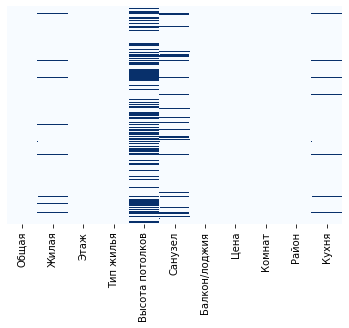

In [77]:
_ = sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap="Blues")

In [78]:
# Посчитаем количество пропусков
print(" Missing in dataset","\n\n", data.isnull().sum().loc[data.isnull().sum() > 0])

 Missing in dataset 

 Жилая               220
Тип жилья             4
Высота потолков    1689
Санузел             366
Кухня               210
dtype: int64


In [80]:
print('Процент пропущенных значений по переменной жилая площадь: ', 
      round(sum(data['Жилая'].isna())/data.shape[0], 2))
print('Процент пропущенных значений по переменной тип жилья: ', 
      round(sum(data['Тип жилья'].isna())/data.shape[0], 3))
print('Процент пропущенных значений по переменной высота потолков: ', 
      round(sum(data['Высота потолков'].isna())/data.shape[0], 2))
print('Процент пропущенных значений по переменной тип санузла: ', 
      round(sum(data['Санузел'].isna())/data.shape[0], 2))
print('Процент пропущенных значений по переменной площадь кухни: ', 
      round(sum(data['Кухня'].isna())/data.shape[0], 2))

Процент пропущенных значений по переменной жилая площадь:  0.06
Процент пропущенных значений по переменной тип жилья:  0.001
Процент пропущенных значений по переменной высота потолков:  0.43
Процент пропущенных значений по переменной тип санузла:  0.09
Процент пропущенных значений по переменной площадь кухни:  0.05


In [14]:
# Обработаем пропущенные значения
print(data['Высота потолков'].value_counts().head(1))
# самым популярным, в тоже время минимальная характеристика
data['Высота потолков'] = data['Высота потолков'].fillna(2.6)

2.6    440
Name: Высота потолков, dtype: int64


In [15]:
print(data['Тип жилья'].value_counts().head(1))
data['Тип жилья'] = data['Тип жилья'].fillna('Вторичка') # вторичка превалирует

Вторичка    3633
Name: Тип жилья, dtype: int64


In [16]:
print(data['Санузел'].value_counts())

раздельный                   1829
совмещенный                  1628
совмещенный, 1 раздельный      34
совмещенных                    25
раздельных                      6
совмещенный, 2 раздельных       2
совмещенных, 1 раздельный       2
совмещенных, 2 раздельных       2
Name: Санузел, dtype: int64


In [17]:
# Заполним пропуски в возрасте наиболее популярным значением по количеству комнат
data.groupby(['Комнат'])['Санузел'].value_counts()

Комнат  Санузел                  
1       совмещенный                  673
        раздельный                   134
        совмещенный, 1 раздельный      1
        совмещенных, 1 раздельный      1
2       раздельный                   766
        совмещенный                  584
        совмещенный, 1 раздельный     17
        совмещенных                    7
        раздельных                     4
        совмещенный, 2 раздельных      1
3       раздельный                   929
        совмещенный                  371
        совмещенных                   18
        совмещенный, 1 раздельный     16
        раздельных                     2
        совмещенных, 2 раздельных      2
        совмещенный, 2 раздельных      1
        совмещенных, 1 раздельный      1
Name: Санузел, dtype: int64

In [18]:
data['Санузел'] = data['Санузел'].fillna('совмещенный')

In [19]:
data['Санузел'].value_counts()

совмещенный                  1994
раздельный                   1829
совмещенный, 1 раздельный      34
совмещенных                    25
раздельных                      6
совмещенный, 2 раздельных       2
совмещенных, 1 раздельный       2
совмещенных, 2 раздельных       2
Name: Санузел, dtype: int64

In [20]:
data.loc[data['Санузел'] == 'совмещенных, 1 раздельный','Санузел'] = 'оба'
data.loc[data['Санузел'] == 'совмещенный, 1 раздельный','Санузел'] = 'оба'
data.loc[data['Санузел'] == 'совмещенный, 2 раздельных','Санузел'] = 'оба'
data.loc[data['Санузел'] == 'совмещенных, 2 раздельных','Санузел'] = 'оба'
data.loc[data['Санузел'] == 'совмещенных','Санузел'] = 'оба'
data.loc[data['Санузел'] == 'раздельных','Санузел'] = 'оба'

print(data['Санузел'].value_counts())

совмещенный    1994
раздельный     1829
оба              71
Name: Санузел, dtype: int64


In [21]:
# Выкидываем оба санузла
data = data.loc[data['Санузел'] != 'оба']

In [22]:
print(data['Санузел'].value_counts())

совмещенный    1994
раздельный     1829
Name: Санузел, dtype: int64


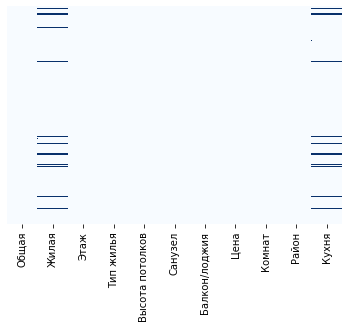

In [23]:
_ = sns.heatmap(data.isnull(),yticklabels=False,cbar=False, cmap="Blues")

In [24]:
# Выкидываем пропуски по площади
data = data.dropna(subset=['Жилая', 'Кухня']) # 246 наблюдений выкинули
print(data.shape)

(3580, 11)


In [25]:
data['Высота потолков'].value_counts()

2.60     1872
2.55      384
2.75      310
2.50      265
3.00      261
2.70      244
2.80       69
2.65       64
2.90       28
3.20       14
2.95        8
3.10        8
2.85        7
2.45        6
3.50        6
2.54        3
1.00        3
2.00        3
3.05        3
2.40        3
3.15        2
2.53        2
9.80        1
4.00        1
2.52        1
2.96        1
2.63        1
2.56        1
2.30        1
2.57        1
2.82        1
2.72        1
3.40        1
3.30        1
3.70        1
13.75       1
2.68        1
Name: Высота потолков, dtype: int64

In [26]:
# Сохраняем данные
# data.to_csv('data_graphs.csv', encoding="utf-8")

In [27]:
#далее удалим выброс с высотой потолка 13,75
data.drop(data[data['Высота потолков'] == 13.75].index, inplace=True)
data.drop(data[data['Высота потолков'] == 9.80].index, inplace=True)

In [28]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Район,Кухня
2,27,13.0,6,Вторичка,2.60,совмещенный,1,1595000,1,Тракторозаводский,6.0
3,32,18.0,3,Вторичка,2.55,совмещенный,1,1600000,1,Советский,6.0
5,32,18.0,2,Вторичка,2.55,совмещенный,1,1660000,1,Краснооктябрьский,6.0
6,29,18.0,2,Вторичка,2.60,совмещенный,1,1440000,1,Дзержинский,6.0
7,62,19.0,12,Новостройка,2.60,совмещенный,1,2529400,1,Краснооктябрьский,12.0


In [29]:
data.info() #итого 3574 наблюдений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3574 entries, 2 to 1537
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Общая            3574 non-null   int64  
 1   Жилая            3574 non-null   float64
 2   Этаж             3574 non-null   int64  
 3   Тип жилья        3574 non-null   object 
 4   Высота потолков  3574 non-null   float64
 5   Санузел          3574 non-null   object 
 6   Балкон/лоджия    3574 non-null   int64  
 7   Цена             3574 non-null   int64  
 8   Комнат           3574 non-null   int64  
 9   Район            3574 non-null   object 
 10  Кухня            3574 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 335.1+ KB


In [30]:
# Проверим уникальные значения для дальнейшего кодирования
data["Тип жилья"].unique()

array(['Вторичка', 'Новостройка', 'Вторичка Апартаменты'], dtype=object)

In [31]:
#'Вторичка Апартаменты' - выкидываем
data = data.loc[data['Тип жилья'] != 'Вторичка Апартаменты']

In [32]:
data["Тип жилья"].unique()

array(['Вторичка', 'Новостройка'], dtype=object)

In [33]:
data["Тип жилья"].value_counts()

Вторичка       3487
Новостройка      83
Name: Тип жилья, dtype: int64

In [34]:
data["Тип жилья"].unique()

array(['Вторичка', 'Новостройка'], dtype=object)

In [35]:
data["Санузел"].unique()

array(['совмещенный', 'раздельный'], dtype=object)

In [36]:
data["Балкон/лоджия"].unique()

array([1, 0, 2, 3])

In [37]:
print(data['Балкон/лоджия'].value_counts())

1    2308
0    1062
2     184
3      16
Name: Балкон/лоджия, dtype: int64


In [38]:
# не важно 2 или 3 балкона, важно, что он есть
data.loc[data['Балкон/лоджия'] == 2, 'Балкон/лоджия'] = 1
data.loc[data['Балкон/лоджия'] == 3, 'Балкон/лоджия'] = 1

In [39]:
print(data['Балкон/лоджия'].value_counts())

1    2508
0    1062
Name: Балкон/лоджия, dtype: int64


In [40]:
data["Комнат"].unique()

array([1, 3, 2])

In [41]:
data["Район"].unique()

array(['Тракторозаводский', 'Советский', 'Краснооктябрьский',
       'Дзержинский', 'Красноармейский', 'Ворошиловский', 'Кировский',
       'Центральный'], dtype=object)

In [42]:
data.info() # 3570 - ИТОГО наблюдений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3570 entries, 2 to 1537
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Общая            3570 non-null   int64  
 1   Жилая            3570 non-null   float64
 2   Этаж             3570 non-null   int64  
 3   Тип жилья        3570 non-null   object 
 4   Высота потолков  3570 non-null   float64
 5   Санузел          3570 non-null   object 
 6   Балкон/лоджия    3570 non-null   int64  
 7   Цена             3570 non-null   int64  
 8   Комнат           3570 non-null   int64  
 9   Район            3570 non-null   object 
 10  Кухня            3570 non-null   float64
dtypes: float64(3), int64(5), object(3)
memory usage: 334.7+ KB


In [43]:
#ЗАКОДИРУЕМ ДАННЫЕ
#Создадим дамми для каждого района
dummies_region = pd.get_dummies(data['Район'])

In [44]:
dummies_region.head()

,Ворошиловский,Дзержинский,Кировский,Красноармейский,Краснооктябрьский,Советский,Тракторозаводский,Центральный
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0
5,0,0,0,0,1,0,0,0
6,0,1,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0


In [45]:
data = pd.concat([data, dummies_region], axis=1)

In [46]:
data = data.drop(['Район'], axis=1)

In [47]:
data.head() #создалось 8 фиктивных переменных для каждого района. ЗА БАЗОВЫЙ ВОЗЬМЕМ ЦЕНТРАЛЬНЫЙ!!!!

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Кухня,Ворошиловский,Дзержинский,Кировский,Красноармейский,Краснооктябрьский,Советский,Тракторозаводский,Центральный
2,27,13.0,6,Вторичка,2.60,совмещенный,1,1595000,1,6.0,0,0,0,0,0,0,1,0
3,32,18.0,3,Вторичка,2.55,совмещенный,1,1600000,1,6.0,0,0,0,0,0,1,0,0
5,32,18.0,2,Вторичка,2.55,совмещенный,1,1660000,1,6.0,0,0,0,0,1,0,0,0
6,29,18.0,2,Вторичка,2.60,совмещенный,1,1440000,1,6.0,0,1,0,0,0,0,0,0
7,62,19.0,12,Новостройка,2.60,совмещенный,1,2529400,1,12.0,0,0,0,0,1,0,0,0


In [48]:
#закодируем санузел. 0 - раздельный, 1 - совмещенный. БАЗОВАЯ СИТУАЦИЯ - РАЗДЕЛЬНЫЙ
label = LabelEncoder()
dicts = {}

label.fit(data.Санузел.drop_duplicates()) #задаем список значений для кодирования
dicts['Санузел'] = list(label.classes_)
data.Санузел = label.transform(data.Санузел) #заменяем значения из списка кодами закодированных элементов

In [49]:
data.head()

,Общая,Жилая,Этаж,Тип жилья,Высота потолков,Санузел,Балкон/лоджия,Цена,Комнат,Кухня,Ворошиловский,Дзержинский,Кировский,Красноармейский,Краснооктябрьский,Советский,Тракторозаводский,Центральный
2,27,13.0,6,Вторичка,2.60,1,1,1595000,1,6.0,0,0,0,0,0,0,1,0
3,32,18.0,3,Вторичка,2.55,1,1,1600000,1,6.0,0,0,0,0,0,1,0,0
5,32,18.0,2,Вторичка,2.55,1,1,1660000,1,6.0,0,0,0,0,1,0,0,0
6,29,18.0,2,Вторичка,2.60,1,1,1440000,1,6.0,0,1,0,0,0,0,0,0
7,62,19.0,12,Новостройка,2.60,1,1,2529400,1,12.0,0,0,0,0,1,0,0,0


In [50]:
# Закодируем тип жилья
# Создадим дамми для каждого жилья
dummies_type = pd.get_dummies(data['Тип жилья'])

In [51]:
dummies_type.head()

,Вторичка,Новостройка
2,1,0
3,1,0
5,1,0
6,1,0
7,0,1


In [52]:
data = pd.concat([data, dummies_type], axis=1)

In [53]:
data = data.drop(['Тип жилья'], axis=1)

In [54]:
data = data.drop(['Новостройка'], axis=1) #БАЗОВАЯ СИТУАЦИЯ - НОВОСТРОЙКА

In [55]:
data = data.drop(['Центральный'], axis=1) #БАЗОВАЯ СИТУАЦИЯ - ЦЕНТРАЛЬНЫЙ

In [56]:
# Создадим дамми для комнат
dummies_room = pd.get_dummies(data['Комнат'])

In [57]:
dummies_room.head()

,1,2,3
2,1,0,0
3,1,0,0
5,1,0,0
6,1,0,0
7,1,0,0


In [58]:
data = pd.concat([data, dummies_room], axis=1)

In [59]:
data = data.drop(['Комнат'], axis=1)

In [60]:
data['Комната1'] = data[1]
data['Комната2'] = data[2]
data['Комната3'] = data[3]

In [61]:
data = data.drop(['Комната1'], axis=1) ### Комната1 - базовая
data = data.drop([1], axis=1)
data = data.drop([2], axis=1)
data = data.drop([3], axis=1)

In [62]:
data.head()

,Общая,Жилая,Этаж,Высота потолков,Санузел,Балкон/лоджия,Цена,Кухня,Ворошиловский,Дзержинский,Кировский,Красноармейский,Краснооктябрьский,Советский,Тракторозаводский,Вторичка,Комната2,Комната3
2,27,13.0,6,2.60,1,1,1595000,6.0,0,0,0,0,0,0,1,1,0,0
3,32,18.0,3,2.55,1,1,1600000,6.0,0,0,0,0,0,1,0,1,0,0
5,32,18.0,2,2.55,1,1,1660000,6.0,0,0,0,0,1,0,0,1,0,0
6,29,18.0,2,2.60,1,1,1440000,6.0,0,1,0,0,0,0,0,1,0,0
7,62,19.0,12,2.60,1,1,2529400,12.0,0,0,0,0,1,0,0,0,0,0


In [63]:
data.shape

(3570, 18)

In [64]:
data.describe()

,Общая,Жилая,Этаж,Высота потолков,Санузел,Балкон/лоджия,Цена,Кухня,Ворошиловский,Дзержинский,Кировский,Красноармейский,Краснооктябрьский,Советский,Тракторозаводский,Вторичка,Комната2,Комната3
count,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3.570000e+03,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000,3570.000000
mean,52.544538,32.123249,4.276751,2.648843,0.498880,0.702521,2.625427e+06,7.934174,0.084314,0.167787,0.131933,0.134454,0.124650,0.129692,0.121849,0.976751,0.385434,0.383473
std,17.434916,11.902327,3.306453,0.148940,0.500069,0.457213,1.540891e+06,3.456390,0.277897,0.373729,0.338465,0.341187,0.330368,0.336011,0.327157,0.150715,0.486766,0.486300
min,19.000000,8.000000,1.000000,1.000000,0.000000,0.000000,6.000000e+05,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,41.000000,24.000000,2.000000,2.600000,0.000000,0.000000,1.770000e+06,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,51.000000,30.000000,4.000000,2.600000,0.000000,1.000000,2.350000e+06,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,62.000000,40.000000,5.000000,2.700000,1.000000,1.000000,3.100000e+06,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,205.000000,177.000000,25.000000,4.000000,1.000000,1.000000,3.450000e+07,45.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [65]:
# Сохраняем данные
data.to_csv('DATA_FINAL.csv', encoding="utf-8")